In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from hyperion.model import ModelOutput
import astropy.constants as const

In [4]:
pc = const.pc.cgs.value

In [5]:
m = ModelOutput('/Users/yaolun/test/model67.rtout')
image = m.get_image(group=5, inclination=0, distance=178. * pc, units='MJy/sr')

In [16]:
# The width of the strip for averaging in arcsec
width = 10

### IRAC band (3.6, 4.5, 5.8, 8.0 $\mu$m)

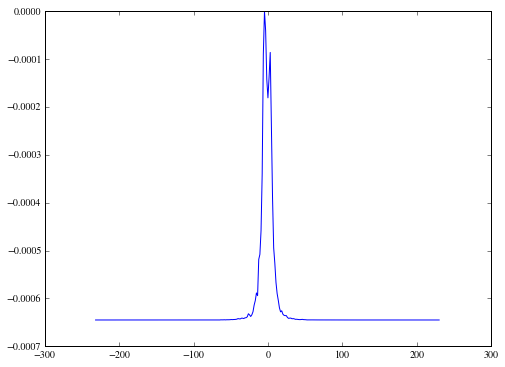

In [17]:
irac_wl = [3.6, 4.5, 5.8, 8.0]
irac_wl = [100]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for wl in irac_wl:
    iwav = np.argmin(np.abs(wl - image.wav))
    # Image in the unit of MJy/sr, change it into erg/s/cm2/Hz/sr
    factor = 1e-23*1e6
    val = image.val[::-1, :, iwav] * factor + 1e-30
    
    # Calculate the image width in arcseconds given the distance used above
    # get the max radius
    rmax = max(m.get_quantities().r_wall)
    w = np.degrees(rmax / image.distance) * 3600.
    
    ave_ind = [len(val[0,:])/2 - width/2 / (2*w/len(val[0,:])), len(val[0,:])/2 + width/2 / (2*w/len(val[0,:]))]
    round_ind = [np.ceil(ave_ind[0]), np.floor(ave_ind[1])]
    frac = [round_ind[0]-ave_ind[0], ave_ind[1]-round_ind[1]]
    
    total_flux = np.sum(val[:,round_ind[0]:round_ind[1]]) + frac[0]*val[:,round_ind[0]-1] + frac[1]*val[:,round_ind[1]+1]
    size = np.arange(-w, w, 2*w/len(total_flux))
    ax.plot(size,np.log10(total_flux/max(total_flux)))